# Linear Regression , Multiple linear regression, polynomial regression

#### importing libraries

In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['scikit-learn'])


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [5]:
await download(path, "auto.csv")
path="auto.csv"

#### Reading data

In [6]:
df=pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Model 1: simple linear regression

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [8]:
#let's take highway-mpg to predict car price

X = df[['highway-mpg']]
Y = df['price']

lm.fit(X,Y)

LinearRegression()

In [9]:
#outputting predictions
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
print(lm.intercept_)
print(lm.coef_)

38423.30585815743
[-821.73337832]


## model evaluation using visualization

In [11]:
import seaborn as sns
%matplotlib inline 

(0.0, 48172.89068583865)

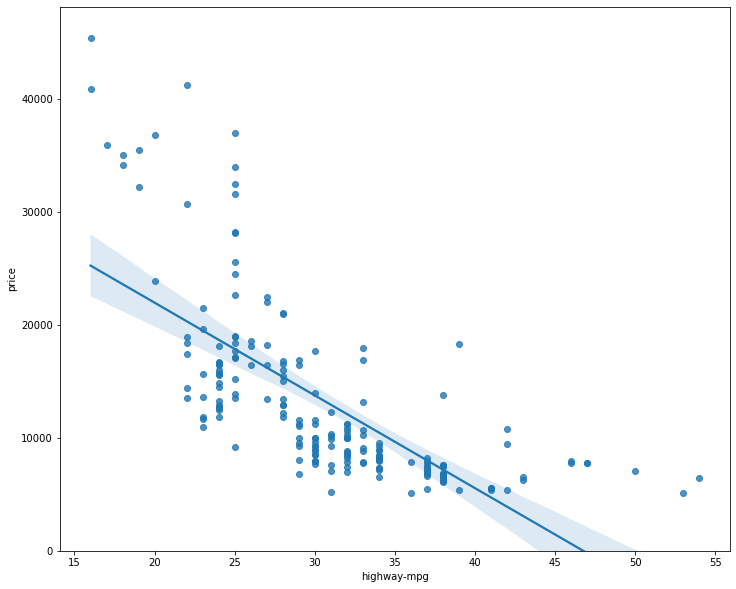

In [12]:
#regression plot

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

#### We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

###### Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

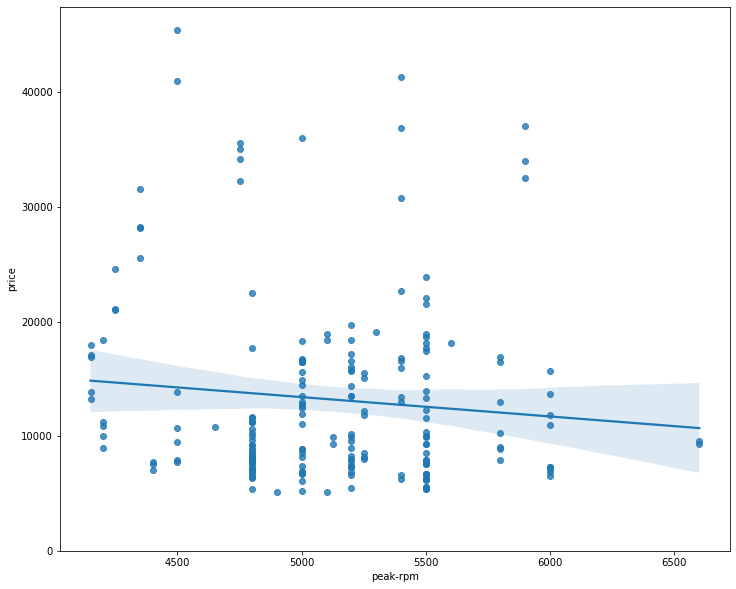

In [13]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [14]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


#### The variable "highway-mpg" has a stronger correlation with "price", as -0.704692  indicates good correlation than -0.101616

## Accuracy of model

In [15]:
#finding R^2
print('The R-square is: ', lm.score(X, Y))


The R-square is:  0.4965911884339176


In [16]:
#finding mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


# MODEL 2:Multiple linear regression

In [17]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression()

In [18]:
lm.intercept_


-15806.62462632922

In [19]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

The eqn we obtain is

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>

### model evaluation using visualization

In [20]:
Y_hat = lm.predict(Z)

/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


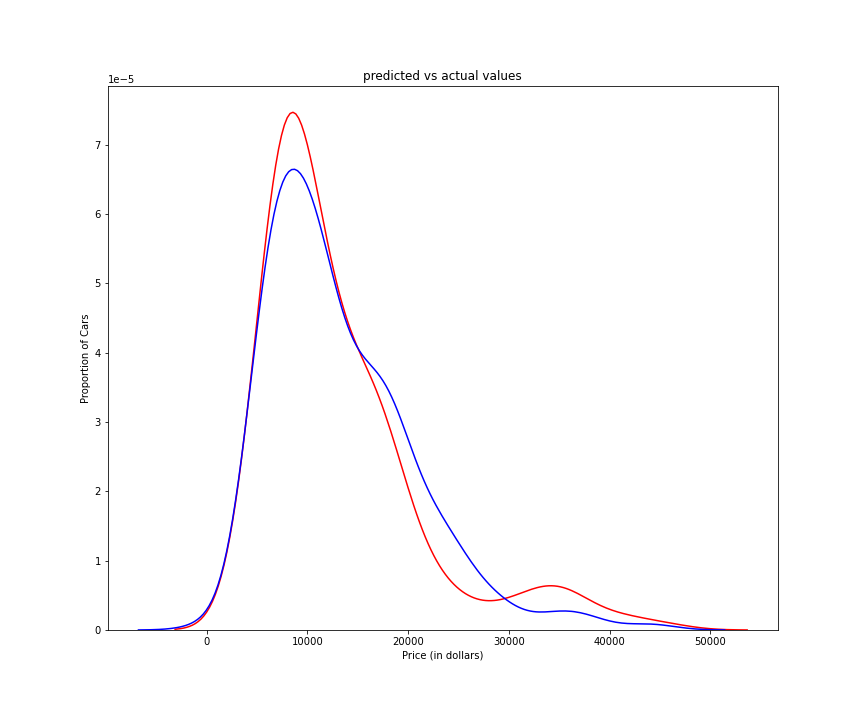

In [31]:
    width = 12
    height = 10
    plt.figure(figsize=(width, height))


    ax1 = sns.distplot(df['price'], hist=False, color="r", label="actual values")
    ax2 = sns.distplot(Y_hat, hist=False, color="b", label="predicted value", ax=ax1)


    plt.title("predicted vs actual values")
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')


    plt.show()
    plt.close()